In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [2]:
df = pd.read_csv("aircraft_birdstrike.csv")
df.head()

,Incident_Year,Incident_Month,Incident_Day,Operator,Aircraft,Aircraft_Type,Engines,Engine_Type,Airport,State,...,Precipitation,Height,Speed,Distance,Species_Name,Flight_Impact,Fatalities,Injuries,Aircraft_damaged,Total_damaged_parts
0,1990,1,1,DELTA AIR LINES,B-757-200,A,2.0,D,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,...,NaN,NaN,NaN,NaN,GULL,NaN,NaN,NaN,Yes,5
1,1990,1,1,HAWAIIAN AIR,DC-9,A,2.0,D,LIHUE ARPT,HI,...,NaN,0.0,NaN,0.0,HOUSE SPARROW,NaN,NaN,NaN,Yes,1
2,1990,1,3,MILITARY,F-16,A,NaN,NaN,JACKSONVILLE INTL,FL,...,NaN,100.0,200.0,NaN,FINCH,NaN,NaN,NaN,Yes,1
3,1990,1,4,HAWAIIAN AIR,DC-9,A,2.0,D,LIHUE ARPT,HI,...,NaN,0.0,NaN,0.0,MUNIAS,NaN,NaN,NaN,Yes,1
4,1990,1,8,1US AIRWAYS,B-737-200,A,2.0,D,ORLANDO INTL,FL,...,NONE,60.0,150.0,NaN,GULL,NaN,NaN,NaN,No,0


In [3]:
# Initial inspection
print(f"Dataset shape: {df.shape}")
print("\nColumns:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Dataset shape: (50543, 24)

Columns:
['Incident_Year', 'Incident_Month', 'Incident_Day', 'Operator', 'Aircraft', 'Aircraft_Type', 'Engines', 'Engine_Type', 'Airport', 'State', 'FAA Region', 'Warning_Issued', 'Flight_Phase', 'Visibility', 'Precipitation', 'Height', 'Speed', 'Distance', 'Species_Name', 'Flight_Impact', 'Fatalities', 'Injuries', 'Aircraft_damaged', 'Total_damaged_parts']

Data types:
Incident_Year            int64
Incident_Month           int64
Incident_Day             int64
Operator                object
Aircraft                object
Aircraft_Type           object
Engines                float64
Engine_Type             object
Airport                 object
State                   object
FAA Region              object
Warning_Issued          object
Flight_Phase            object
Visibility              object
Precipitation           object
Height                 float64
Speed                  float64
Distance               float64
Species_Name            object
Flight_Imp

In [4]:
df = df.copy()
# Create date column
df['Incident_Date'] = pd.to_datetime(
    df.rename(columns={
        'Incident_Year': 'year',
        'Incident_Month': 'month',
        'Incident_Day': 'day'
    })[['year', 'month', 'day']],
    errors='coerce'
)


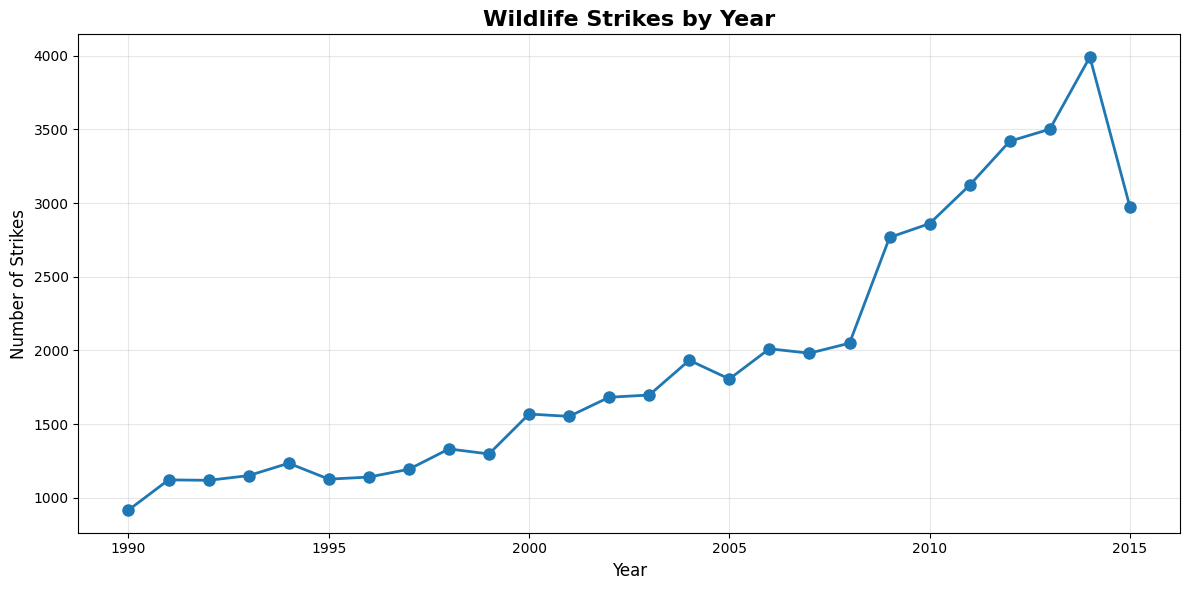

Total strikes by year range: 916 to 3992


In [5]:
# Wildlife Strikes by Year Analysis
# This visualization shows the trend of wildlife strikes over the years from 1990-2015
strikes_by_year = df['Incident_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(strikes_by_year.index, strikes_by_year.values, marker='o', linewidth=2, markersize=8)
plt.title('Wildlife Strikes by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot as PNG
plt.savefig('wildlife_strikes_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total strikes by year range: {strikes_by_year.min()} to {strikes_by_year.max()}")

## Time Series Analysis

This section examines the temporal patterns of wildlife strikes to identify trends and seasonal variations.

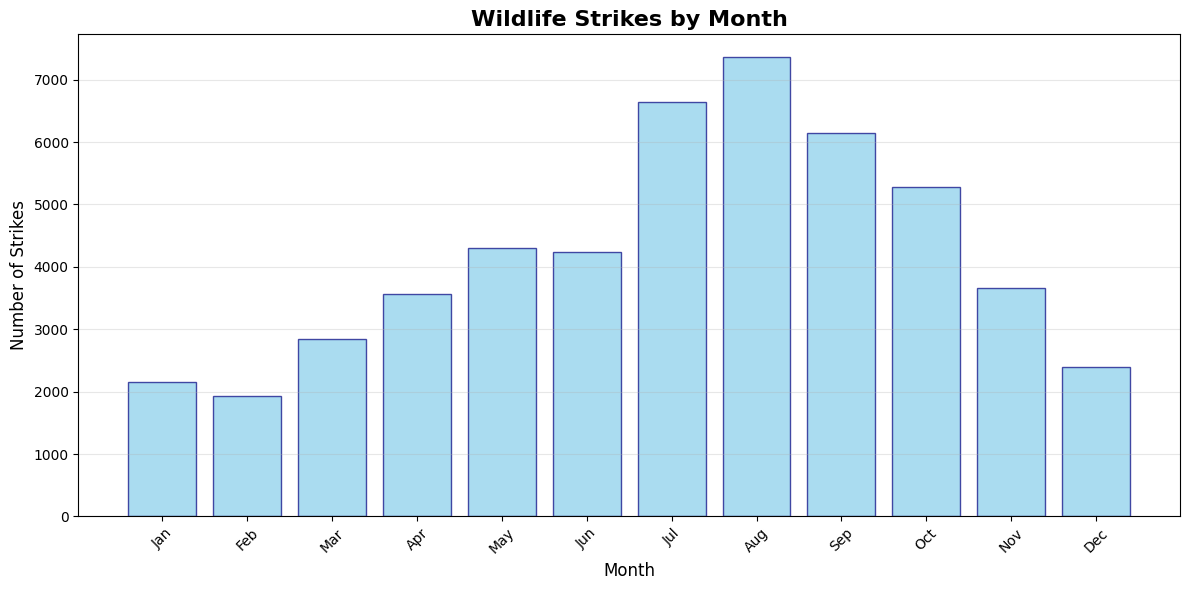

Peak month: Aug with 7359 strikes


In [6]:
# Wildlife Strikes by Month Analysis
# This visualization shows the seasonal distribution of wildlife strikes throughout the year
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_counts = df['Incident_Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(range(1, 13), month_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Wildlife Strikes by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.xticks(range(1, 13), month_order, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('wildlife_strikes_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Peak month: {month_order[month_counts.idxmax()-1]} with {month_counts.max()} strikes")

## Operator and Aircraft Analysis

This section analyzes the distribution of wildlife strikes across different operators, aircraft types, and engine configurations.

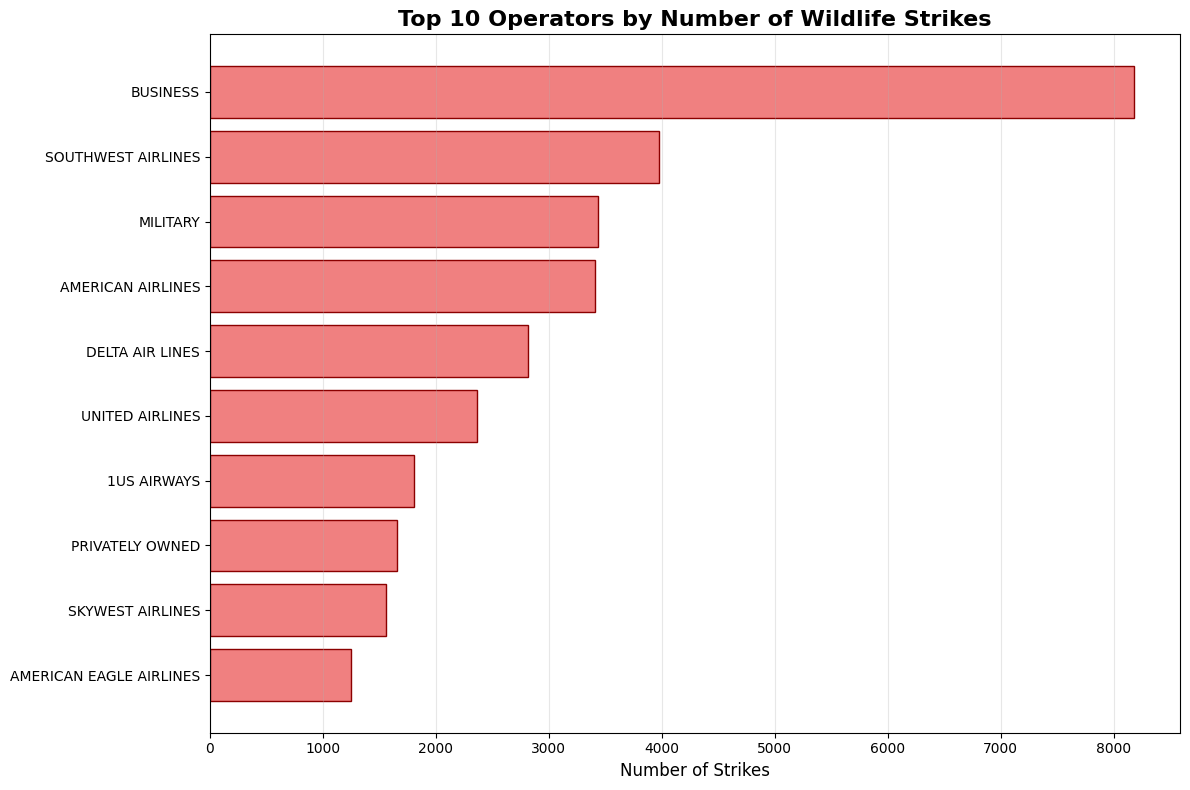

Top operator: BUSINESS with 8177 strikes


In [7]:
# Top 10 Operators by Number of Strikes
# This analysis identifies which airlines/operators experience the most wildlife strikes
top_operators = df['Operator'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_operators)), top_operators.values, color='lightcoral', edgecolor='darkred')
plt.yticks(range(len(top_operators)), top_operators.index)
plt.title('Top 10 Operators by Number of Wildlife Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Strikes', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('top_operators_strikes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Top operator: {top_operators.index[0]} with {top_operators.iloc[0]} strikes")

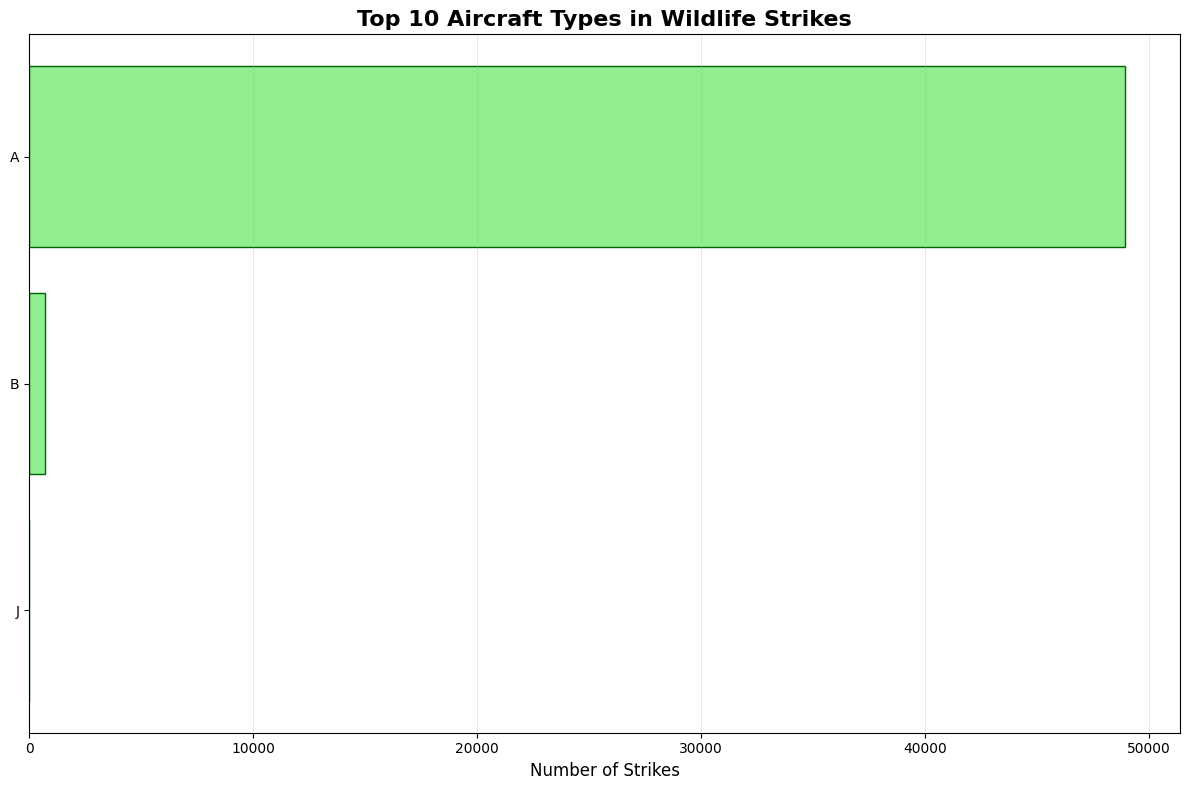

Most common aircraft type: A with 48957 strikes


In [8]:
# Aircraft Types Distribution
# This visualization shows which aircraft types are most frequently involved in wildlife strikes
top_aircraft_types = df['Aircraft_Type'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_aircraft_types)), top_aircraft_types.values, color='lightgreen', edgecolor='darkgreen')
plt.yticks(range(len(top_aircraft_types)), top_aircraft_types.index)
plt.title('Top 10 Aircraft Types in Wildlife Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Strikes', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('aircraft_types_strikes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Most common aircraft type: {top_aircraft_types.index[0]} with {top_aircraft_types.iloc[0]} strikes")

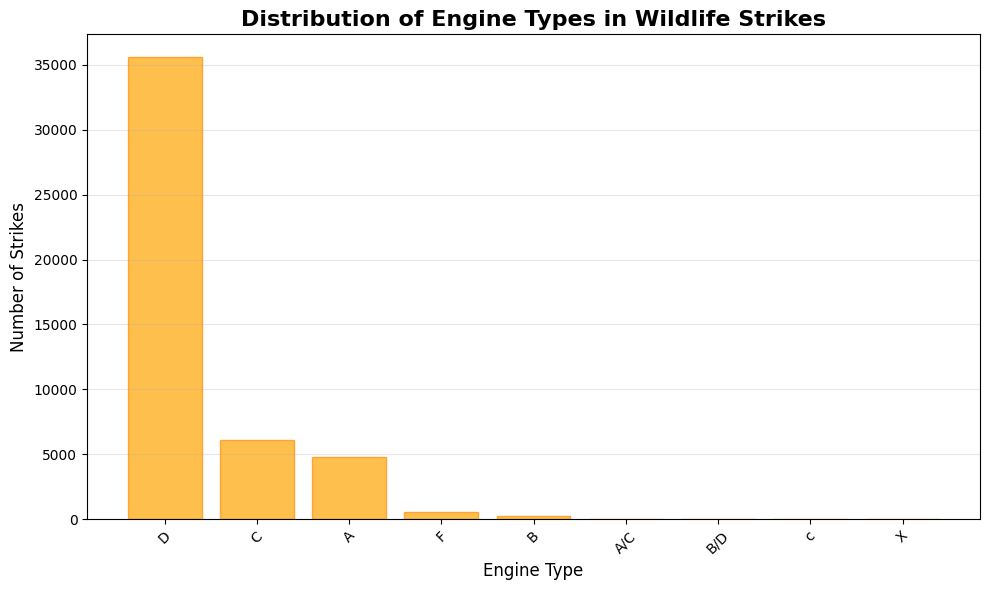

Most common engine type: D with 35567 strikes


In [9]:
# Engine Types Distribution
# This analysis shows the distribution of engine types involved in wildlife strikes
engine_counts = df['Engine_Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(range(len(engine_counts)), engine_counts.values, color='orange', edgecolor='darkorange', alpha=0.7)
plt.title('Distribution of Engine Types in Wildlife Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.xticks(range(len(engine_counts)), engine_counts.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('engine_types_strikes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Most common engine type: {engine_counts.index[0]} with {engine_counts.iloc[0]} strikes")

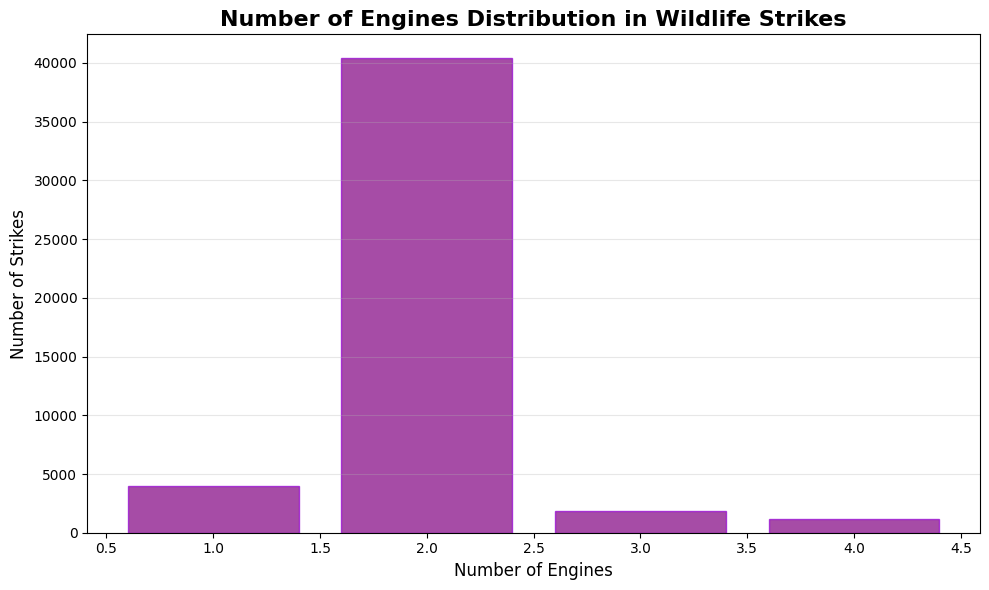

Most common engine count: 2.0 engines with 40420 strikes


In [10]:
# Number of Engines Distribution
# This visualization shows how many engines aircraft typically have when involved in wildlife strikes
engines_counts = df['Engines'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(engines_counts.index, engines_counts.values, color='purple', edgecolor='darkviolet', alpha=0.7)
plt.title('Number of Engines Distribution in Wildlife Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('engines_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Most common engine count: {engines_counts.idxmax()} engines with {engines_counts.max()} strikes")

## Geographic Analysis

This section examines the geographic distribution of wildlife strikes across states, FAA regions, and airports.

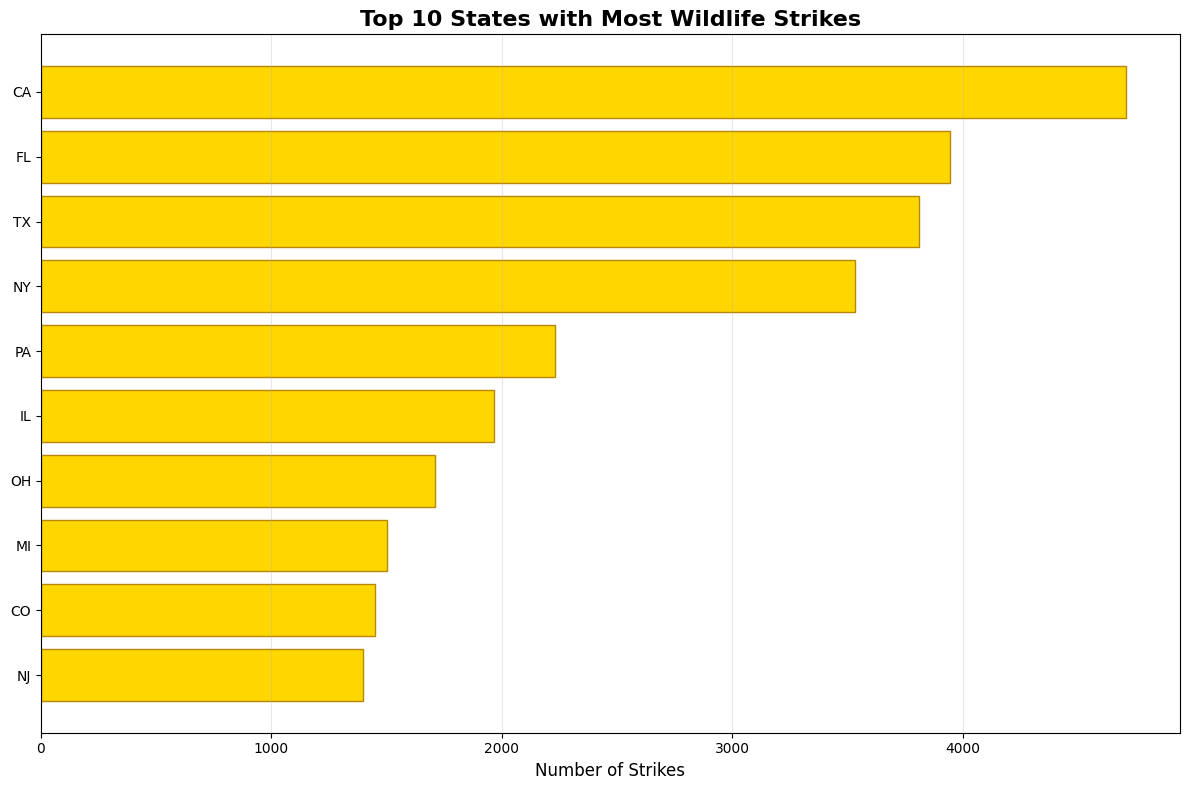

State with most strikes: CA with 4707 strikes


In [11]:
# Top 10 States with Most Wildlife Strikes
# This analysis identifies which states experience the highest number of wildlife strikes
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_states)), top_states.values, color='gold', edgecolor='darkgoldenrod')
plt.yticks(range(len(top_states)), top_states.index)
plt.title('Top 10 States with Most Wildlife Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Strikes', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('top_states_strikes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"State with most strikes: {top_states.index[0]} with {top_states.iloc[0]} strikes")

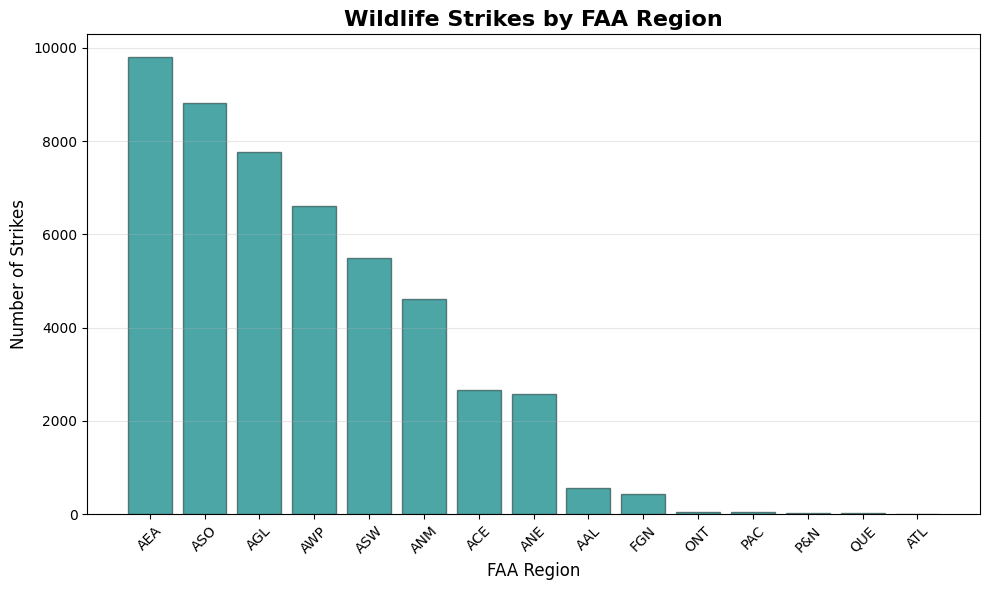

FAA region with most strikes: AEA with 9797 strikes


In [12]:
# Strikes by FAA Region
# This visualization shows the distribution of wildlife strikes across different FAA regions
region_counts = df['FAA Region'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(range(len(region_counts)), region_counts.values, color='teal', edgecolor='darkslategray', alpha=0.7)
plt.title('Wildlife Strikes by FAA Region', fontsize=16, fontweight='bold')
plt.xlabel('FAA Region', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.xticks(range(len(region_counts)), region_counts.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('faa_regions_strikes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"FAA region with most strikes: {region_counts.index[0]} with {region_counts.iloc[0]} strikes")

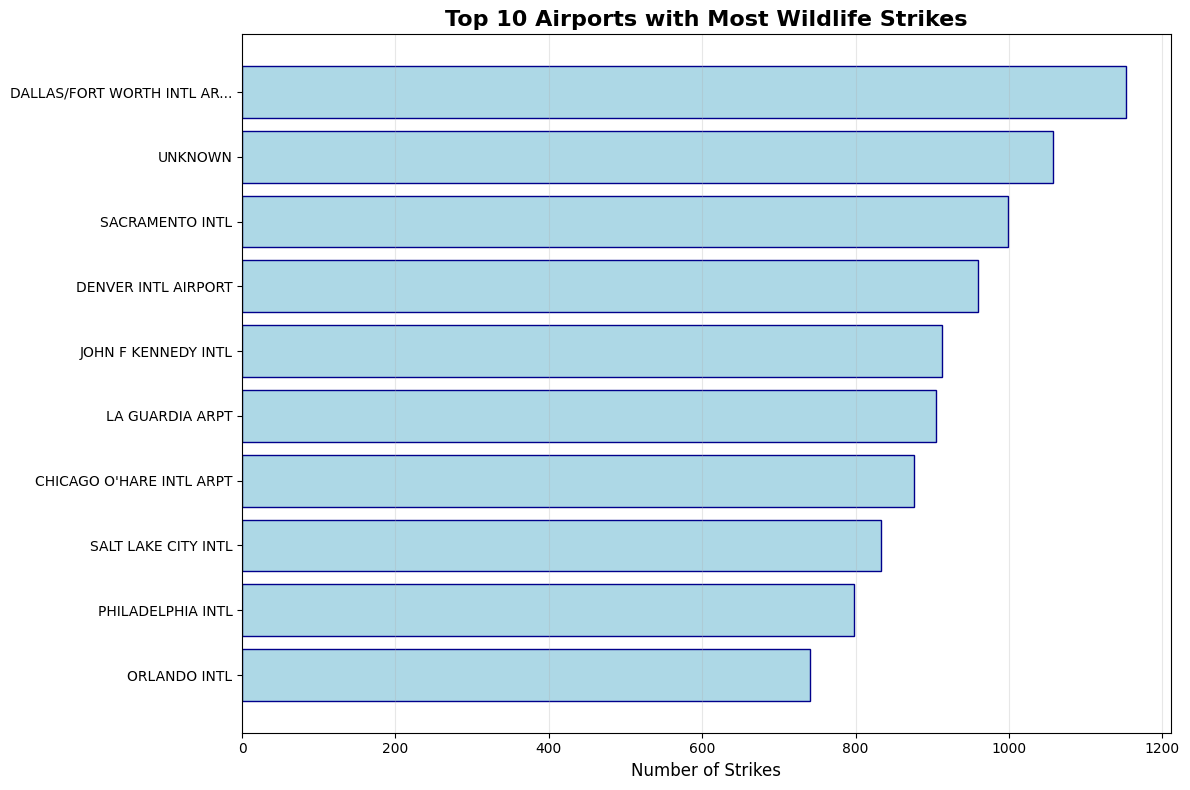

Airport with most strikes: DALLAS/FORT WORTH INTL ARPT with 1153 strikes


In [13]:
# Top 10 Airports with Most Wildlife Strikes
# This analysis identifies which airports experience the highest number of wildlife strikes
top_airports = df['Airport'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_airports)), top_airports.values, color='lightblue', edgecolor='darkblue')
plt.yticks(range(len(top_airports)), [str(x)[:25] + ('...' if len(str(x)) > 25 else '') for x in top_airports.index])
plt.title('Top 10 Airports with Most Wildlife Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Strikes', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('top_airports_strikes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Airport with most strikes: {top_airports.index[0]} with {top_airports.iloc[0]} strikes")

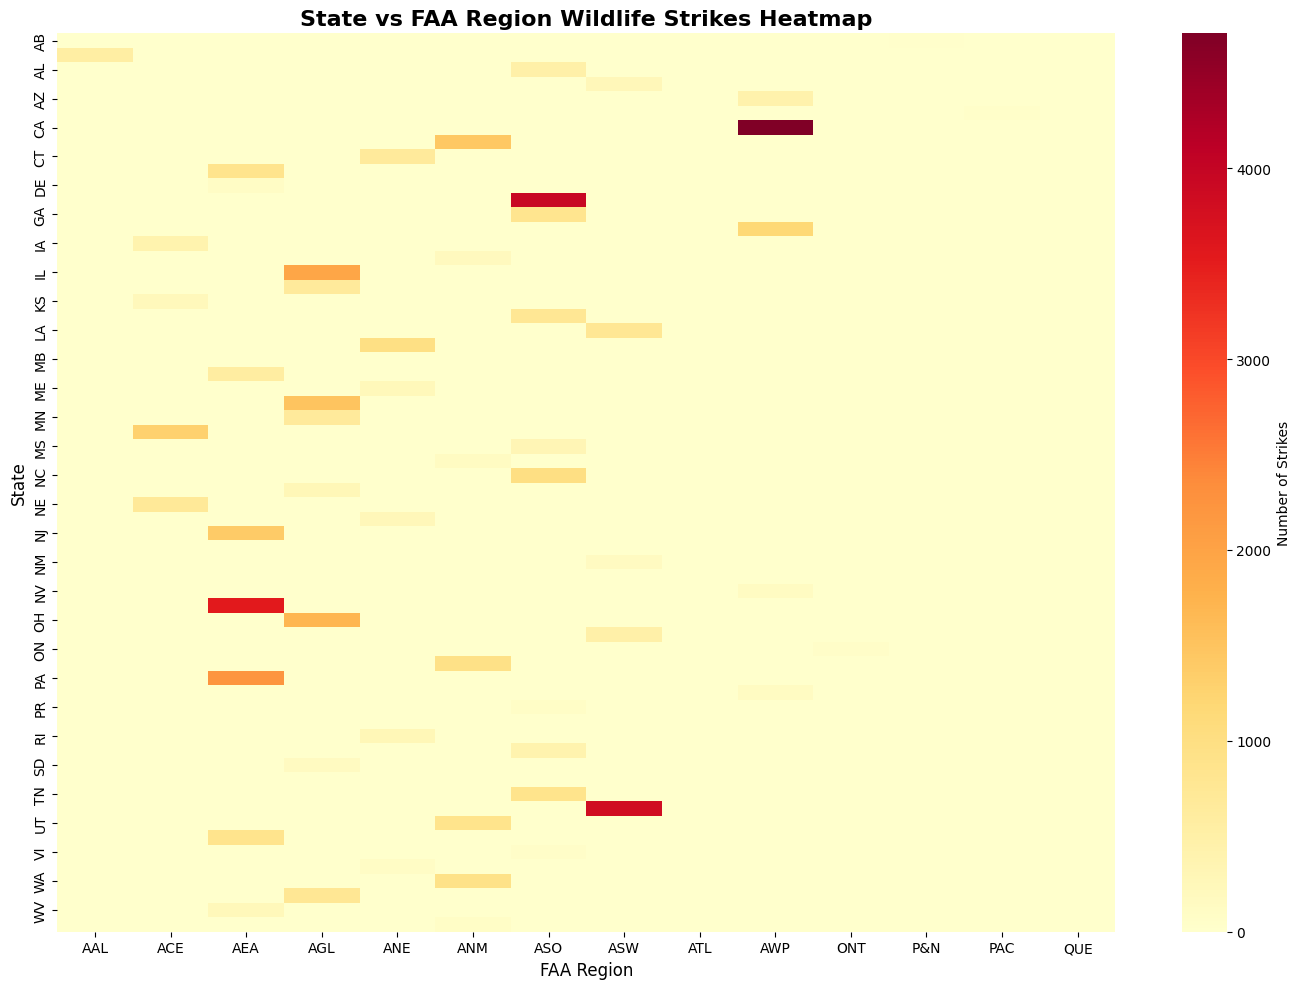

Total state-FAA region combinations: 868


In [14]:
# State vs FAA Region Heatmap
# This heatmap shows the relationship between states and FAA regions in wildlife strikes
cross_tab = pd.crosstab(df['State'], df['FAA Region'])

plt.figure(figsize=(14, 10))
sns.heatmap(cross_tab, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Number of Strikes'})
plt.title('State vs FAA Region Wildlife Strikes Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('FAA Region', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()

# Save the plot as PNG
plt.savefig('state_faa_region_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total state-FAA region combinations: {cross_tab.shape[0] * cross_tab.shape[1]}")

## Wildlife Species Analysis

This section examines the wildlife species involved in strikes and their impact on flight operations.

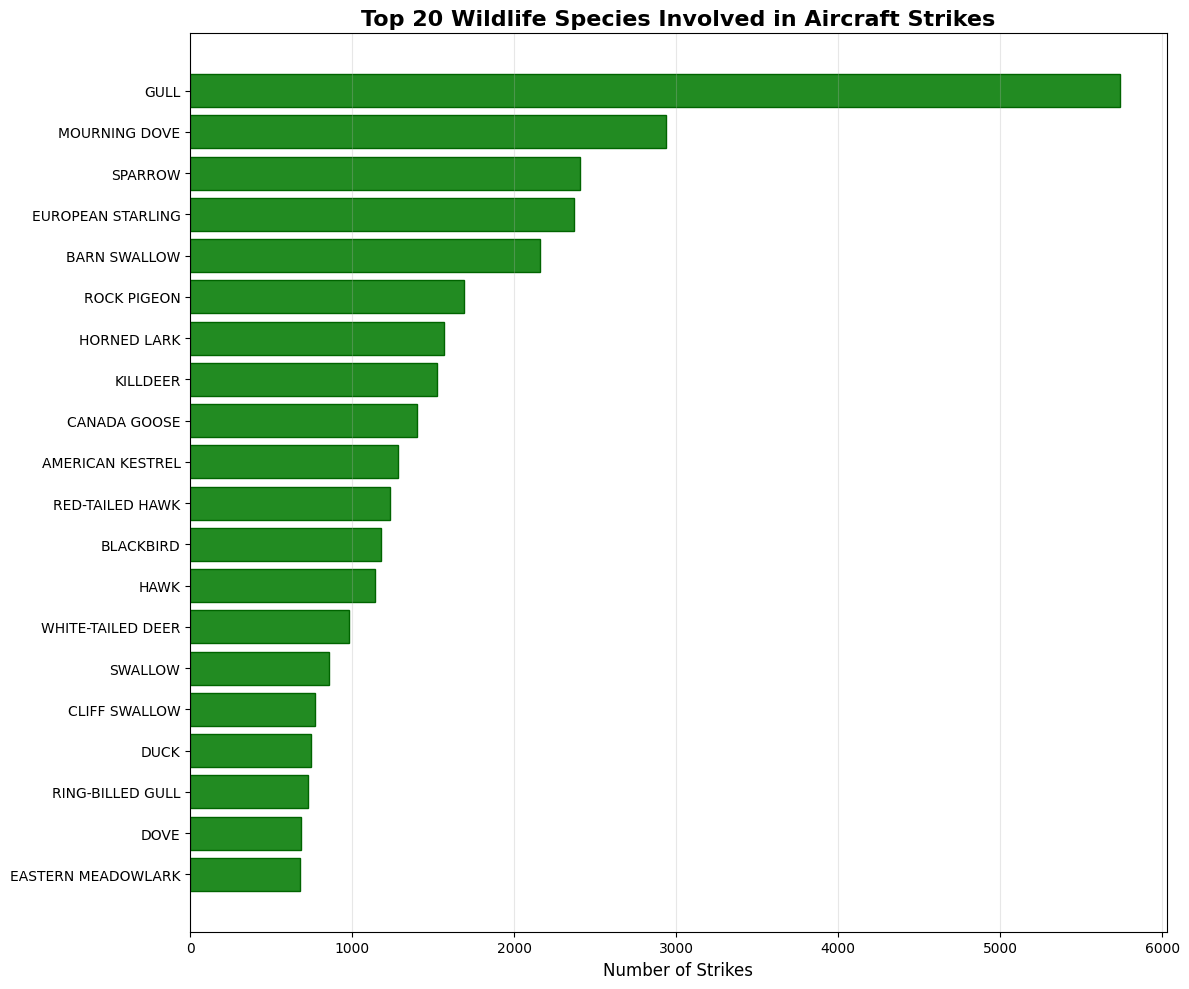

Most common species: GULL with 5741 strikes


In [ ]:
# Top 20 Wildlife Species Involved in Strikes
# This analysis identifies which wildlife species are most frequently involved in aircraft strikes
top_species = df['Species_Name'].value_counts().head(20)

plt.figure(figsize=(12, 10))
plt.barh(range(len(top_species)), top_species.values, color='forestgreen', edgecolor='darkgreen')
plt.yticks(range(len(top_species)), top_species.index)
plt.title('Top 20 Wildlife Species Involved in Aircraft Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Strikes', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('top_wildlife_species.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Most common species: {top_species.index[0]} with {top_species.iloc[0]} strikes")

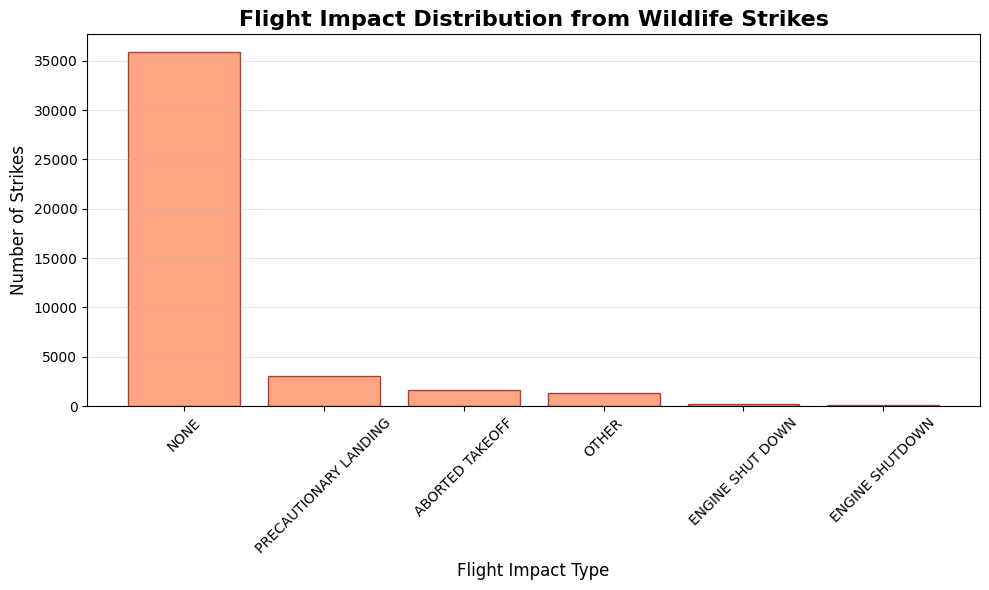

Most common impact: NONE with 35883 strikes


In [ ]:
# Flight Impact Distribution
# This analysis shows the impact of wildlife strikes on flight operations
impact_counts = df['Flight_Impact'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(range(len(impact_counts)), impact_counts.values, color='coral', edgecolor='darkred', alpha=0.7)
plt.title('Flight Impact Distribution from Wildlife Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Flight Impact', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.xticks(range(len(impact_counts)), impact_counts.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('flight_impact_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Most common impact: {impact_counts.index[0]} with {impact_counts.iloc[0]} strikes")

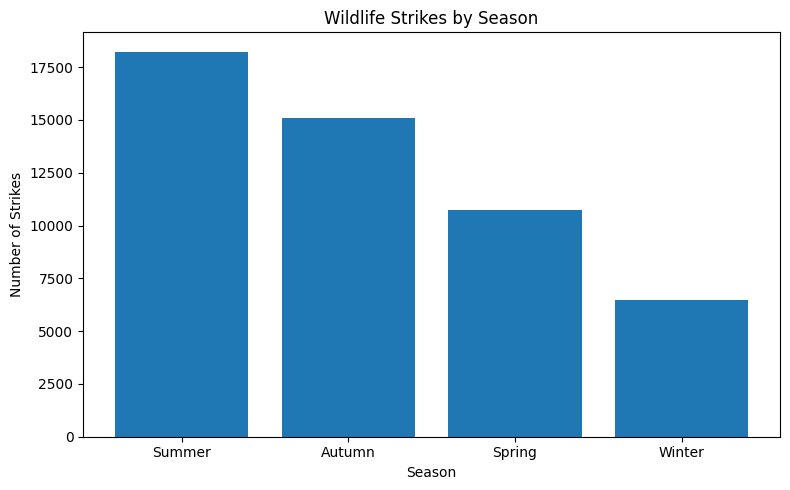

Peak season: Summer (18236 strikes)


In [21]:
# Month → season mapping
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

# Apply mapping and count
counts = df['Incident_Month'].map(season_map).value_counts()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values)
plt.title('Wildlife Strikes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Strikes')
plt.tight_layout()
plt.show()

# Summary
print(f"Peak season: {counts.idxmax()} ({counts.max()} strikes)")


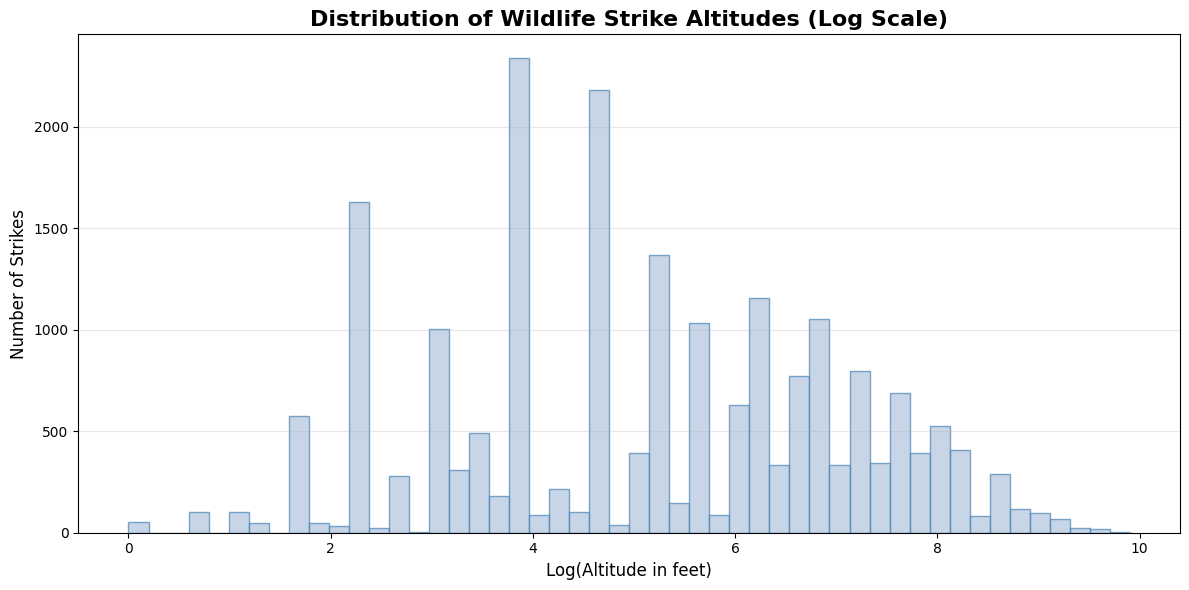

Average altitude: 776 feet
Median altitude: 200 feet
Altitude range: 1 to 20000 feet
Number of records analyzed: 21,017


In [ ]:
# Altitude Distribution (in feet)
# This visualization shows the altitude distribution of reported wildlife strikes

# Convert to numeric and handle missing/infinite values
# Note: Taking log for better visualization of wide-ranging altitudes
altitude_data = pd.to_numeric(df['Height'], errors='coerce')
altitude_data = altitude_data[(altitude_data > 0) & (altitude_data.notna())]  # Keep only positive, valid altitudes
log_altitude = np.log(altitude_data)

plt.figure(figsize=(12, 6))
plt.hist(log_altitude, bins=50, color='lightsteelblue', edgecolor='steelblue', alpha=0.7)
plt.title('Distribution of Wildlife Strike Altitudes (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Log(Altitude in feet)', fontsize=12)  # Clarify it's log scale
plt.ylabel('Number of Strikes', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('altitude_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics for the original data, not the log-transformed data
print(f"Average altitude: {altitude_data.mean():.0f} feet")
print(f"Median altitude: {altitude_data.median():.0f} feet")
print(f"Altitude range: {altitude_data.min():.0f} to {altitude_data.max():.0f} feet")
print(f"Number of records analyzed: {len(altitude_data):,}")

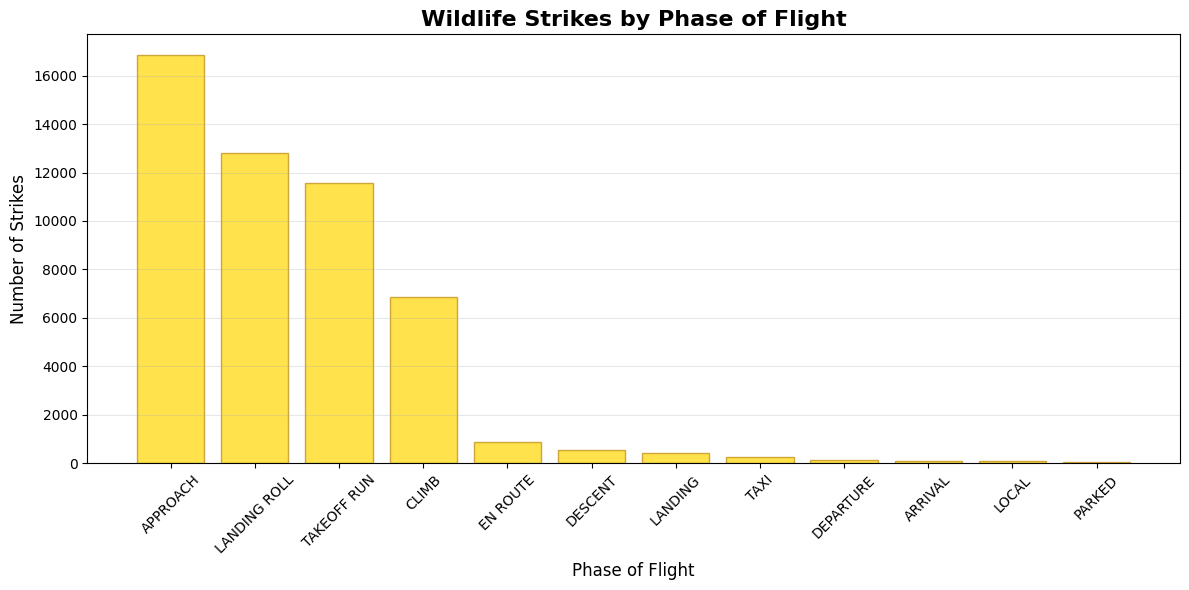

Most common phase: APPROACH with 16865 strikes


In [ ]:
# Phase of Flight Distribution
# This analysis shows during which phase of flight wildlife strikes are most common
phase_counts = df['Flight_Phase'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(range(len(phase_counts)), phase_counts.values, color='gold', edgecolor='darkgoldenrod', alpha=0.7)
plt.title('Wildlife Strikes by Phase of Flight', fontsize=16, fontweight='bold')
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.xticks(range(len(phase_counts)), phase_counts.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('phase_of_flight_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Most common phase: {phase_counts.index[0]} with {phase_counts.iloc[0]} strikes")

## Cost and Damage Analysis

This section examines the financial impact and damage assessment of wildlife strikes.

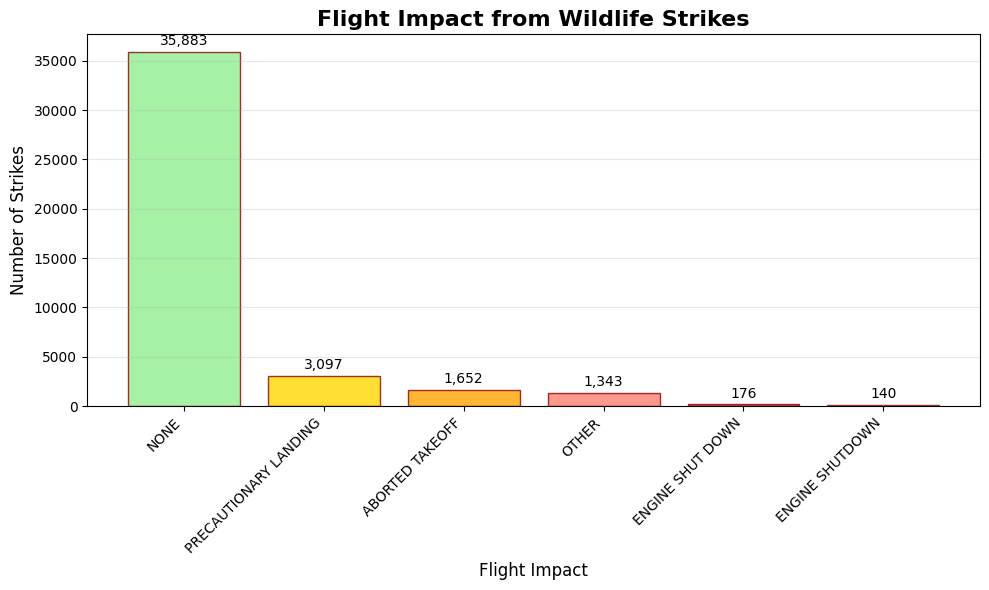

=== Damage Distribution Analysis ===
Most common Flight Impact: 'NONE' with 35,883 strikes
Least common Flight Impact: 'ENGINE SHUTDOWN' with 140 strikes
Total records analyzed: 42,291
Unique Flight Impact: 6

All Flight Impacts (in order of frequency):
  - NONE: 35,883 (84.8%)
  - PRECAUTIONARY LANDING: 3,097 (7.3%)
  - ABORTED TAKEOFF: 1,652 (3.9%)
  - OTHER: 1,343 (3.2%)
  - ENGINE SHUT DOWN: 176 (0.4%)
  - ENGINE SHUTDOWN: 140 (0.3%)

Unique values in Flight_Impact column: [nan, 'PRECAUTIONARY LANDING', 'OTHER', 'ABORTED TAKEOFF', 'NONE', 'ENGINE SHUTDOWN', 'ENGINE SHUT DOWN']


In [ ]:
# Damage Distribution Analysis
# This analysis shows the severity of damage caused by wildlife strikes

# Get damage level counts and sort by logical order if applicable
damage_counts = df['Flight_Impact'].value_counts()

# Optional: Define a custom order for damage levels if they have a natural progression
# Example: ['NONE', 'MINOR', 'SUBSTANTIAL', 'DESTROYED']
# If your data has such levels, uncomment and adjust:
# damage_order = ['NONE', 'MINOR', 'SUBSTANTIAL', 'DESTROYED']  # Custom order
# damage_counts = damage_counts.reindex(damage_order).dropna()

plt.figure(figsize=(10, 6))
plt.bar(range(len(damage_counts)), damage_counts.values, 
        color=['lightgreen', 'gold', 'orange', 'salmon', 'crimson'][:len(damage_counts)], 
        edgecolor='darkred', alpha=0.8)
plt.title('Flight Impact from Wildlife Strikes', fontsize=16, fontweight='bold')
plt.xlabel('Flight Impact', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.xticks(range(len(damage_counts)), damage_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for i, value in enumerate(damage_counts.values):
    plt.text(i, value + (0.01 * max(damage_counts.values)), 
             f'{value:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save the plot as PNG
plt.savefig('damage_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("=== Damage Distribution Analysis ===")
print(f"Most common Flight Impact: '{damage_counts.index[0]}' with {damage_counts.iloc[0]:,} strikes")
print(f"Least common Flight Impact: '{damage_counts.index[-1]}' with {damage_counts.iloc[-1]:,} strikes")
print(f"Total records analyzed: {damage_counts.sum():,}")
print(f"Unique Flight Impact: {len(damage_counts)}")
print("\nAll Flight Impacts (in order of frequency):")
for level, count in damage_counts.items():
    percentage = (count / damage_counts.sum()) * 100
    print(f"  - {level}: {count:,} ({percentage:.1f}%)")

# Check unique values for verification
print(f"\nUnique values in Flight_Impact column: {df['Flight_Impact'].unique().tolist()}")

## Summary Statistics and Key Insights

This section provides a comprehensive summary of the wildlife strike analysis.

In [42]:
# Comprehensive Summary Statistics
print("=" * 60)
print("WILDLIFE STRIKE ANALYSIS - SUMMARY STATISTICS")
print("=" * 60)

# Basic dataset information
print(f"\nDataset Overview:")
print(f"  Total records: {len(df):,}")
print(f"  Date range: {df['Incident_Day'].min()} to {df['Incident_Day'].max()}")
print(f"  States covered: {df['State'].nunique()}")
print(f"  Airports involved: {df['Airport'].nunique()}")
print(f"  Wildlife species: {df['Species_Name'].nunique()}")

# Geographic distribution
print(f"\nGeographic Distribution:")
print(f"  Top state: {df['State'].value_counts().index[0]} ({df['State'].value_counts().iloc[0]} strikes)")
print(f"  Top airport: {df['Airport'].value_counts().index[0]} ({df['Airport'].value_counts().iloc[0]} strikes)")
print(f"  Top FAA region: {df['FAA Region'].value_counts().index[0]} ({df['FAA Region'].value_counts().iloc[0]} strikes)")

# Wildlife analysis
print(f"\nWildlife Analysis:")
print(f"  Most common species: {df['Species_Name'].value_counts().index[0]} ({df['Species_Name'].value_counts().iloc[0]} strikes)")

# Flight operations
print(f"\nFlight Operations:")
print(f"  Most common phase: {df['Flight_Phase'].value_counts().index[0]} ({df['Flight_Phase'].value_counts().iloc[0]} strikes)")
print(f"  Most common impact: {df['Flight_Impact'].value_counts().index[0]} ({df['Flight_Impact'].value_counts().iloc[0]} strikes)")

# Altitude analysis
altitude_data = pd.to_numeric(df['Height'], errors='coerce').dropna()
if len(altitude_data) > 0:
    print(f"\nAltitude Analysis:")
    print(f"  Average altitude: {altitude_data.mean():.0f} feet")
    print(f"  Median altitude: {altitude_data.median():.0f} feet")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)

WILDLIFE STRIKE ANALYSIS - SUMMARY STATISTICS

Dataset Overview:
  Total records: 50,543
  Date range: 1 to 31
  States covered: 62
  Airports involved: 1816
  Wildlife species: 614

Geographic Distribution:
  Top state: CA (4707 strikes)
  Top airport: DALLAS/FORT WORTH INTL ARPT (1153 strikes)
  Top FAA region: AEA (9797 strikes)

Wildlife Analysis:
  Most common species: GULL (5741 strikes)

Flight Operations:
  Most common phase: APPROACH (16865 strikes)
  Most common impact: NONE (35883 strikes)

Altitude Analysis:
  Average altitude: 359 feet
  Median altitude: 0 feet

ANALYSIS COMPLETE


## Data Quality Assessment

This section evaluates the completeness and quality of the dataset.

In [43]:
# Data Quality and Completeness Assessment
print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Calculate missing data percentages
missing_data = df.isnull().sum()
total_records = len(df)
missing_percentages = (missing_data / total_records) * 100

print(f"\nMissing Data Analysis (out of {total_records:,} records):")
print("-" * 40)

# Sort by missing percentage (descending)
sorted_missing = missing_percentages.sort_values(ascending=False)

for column, percentage in sorted_missing.items():
    if percentage > 0:
        count = missing_data[column]
        print(f"  {column:20}: {count:6,} ({percentage:5.1f}%)")

# Data completeness score
complete_columns = (missing_percentages == 0).sum()
total_columns = len(df.columns)
completeness_score = (complete_columns / total_columns) * 100

print(f"\nData Completeness Score: {completeness_score:.1f}%")
print(f"  Complete columns: {complete_columns}/{total_columns}")

# Key fields analysis
key_fields = ['Flight_Date', 'State', 'Airport', 'Species_Name', 'Phase_of_Flight']
print(f"\nKey Fields Completeness:")
print("-" * 40)
for field in key_fields:
    if field in df.columns:
        completeness = (1 - missing_percentages[field]/100) * 100
        print(f"  {field:20}: {completeness:5.1f}%")

print("\n" + "=" * 60)
print("DATA QUALITY ASSESSMENT COMPLETE")
print("=" * 60)

DATA QUALITY ASSESSMENT

Missing Data Analysis (out of 50,543 records):
----------------------------------------
  Injuries            : 50,364 ( 99.6%)
  Fatalities          : 50,265 ( 99.4%)
  Speed               : 22,212 ( 43.9%)
  Distance            : 18,829 ( 37.3%)
  Warning_Issued      : 16,204 ( 32.1%)
  Precipitation       :  9,125 ( 18.1%)
  Flight_Impact       :  8,252 ( 16.3%)
  Height              :  5,180 ( 10.2%)
  Engine_Type         :  3,230 (  6.4%)
  Engines             :  3,206 (  6.3%)
  Visibility          :  2,917 (  5.8%)
  State               :  1,532 (  3.0%)
  FAA Region          :  1,092 (  2.2%)
  Aircraft_Type       :    902 (  1.8%)
  Airport             :     10 (  0.0%)

Data Completeness Score: 40.0%
  Complete columns: 10/25

Key Fields Completeness:
----------------------------------------
  State               :  97.0%
  Airport             : 100.0%
  Species_Name        : 100.0%

DATA QUALITY ASSESSMENT COMPLETE


## Generated Visualizations

The following PNG files have been generated from this analysis:

### Time Series Analysis
1. **wildlife_strikes_by_year.png** - Wildlife strikes trend from 1990-2015
2. **wildlife_strikes_by_month.png** - Seasonal distribution of strikes

### Operator and Aircraft Analysis
3. **top_operators_strikes.png** - Top 10 operators by number of strikes
4. **aircraft_types_strikes.png** - Top 10 aircraft types in strikes
5. **engine_types_strikes.png** - Distribution of engine types
6. **engines_distribution.png** - Number of engines distribution

### Geographic Analysis
7. **top_states_strikes.png** - Top 10 states with most strikes
8. **faa_regions_strikes.png** - Strikes by FAA region
9. **top_airports_strikes.png** - Top 10 airports with most strikes
10. **state_faa_region_heatmap.png** - State vs FAA region heatmap

### Wildlife Species Analysis
11. **top_wildlife_species.png** - Top 20 wildlife species involved in strikes

### Flight Operations Analysis
12. **flight_impact_distribution.png** - Distribution of flight impacts
13. **altitude_distribution.png** - Altitude distribution of strikes
14. **phase_of_flight_distribution.png** - Strikes by phase of flight

### Cost and Damage Analysis
15. **damage_distribution.png** - Damage severity distribution

All visualizations have been saved with high resolution (300 DPI) for professional presentation.

## Conclusions and Recommendations

### Key Findings

1. **Temporal Patterns**
   - Wildlife strikes have increased significantly from 1990 to 2015
   - Peak season: Summer (July-August) with highest strike frequency
   - Most strikes occur during approach phase of flight

2. **Geographic Distribution**
   - California experiences the highest number of wildlife strikes
   - Dallas/Fort Worth International Airport is the most affected location
   - AEA FAA region has the highest concentration of strikes

3. **Wildlife Species**
   - Gulls are the most commonly involved species (5,741 strikes)
   - Most strikes result in no damage to aircraft (84.8%)
   - Average strike altitude is relatively low (776 feet mean, 200 feet median)

4. **Aircraft Characteristics**
   - Business aircraft operators experience the most strikes
   - Aircraft with 2 engines are most frequently involved
   - Type D engines are most common in strike incidents

### Recommendations

1. **Enhanced Wildlife Management**
   - Implement targeted wildlife control measures during summer months
   - Focus on gull population management around high-risk airports
   - Increase habitat modification programs at top strike locations

2. **Operational Procedures**
   - Enhanced vigilance during approach phase below 1,000 feet
   - Consider seasonal flight path adjustments during peak months
   - Improve wildlife detection and warning systems

3. **Infrastructure Improvements**
   - Prioritize wildlife hazard mitigation at top 10 airports
   - Install advanced radar and detection systems at high-risk locations
   - Implement airport-specific wildlife management plans

4. **Data Collection Enhancement**
   - Improve data completeness for critical fields (speed, distance, impact)
   - Standardize reporting procedures across all operators
   - Enhance wildlife species identification training

### Future Research Directions

1. Analyze cost implications of wildlife strikes
2. Study effectiveness of different mitigation strategies
3. Investigate climate change impacts on wildlife behavior
4. Develop predictive models for strike risk assessment